# **FINAL PROJECT EDA**

**Kelompok 7**
1. Delfrin Adiyatma Situmeang (2106759722)
2. Vesya Padmadewi (210672692)
3. Dexcel Oswald Otniel (2106726932)
4. Rifqah Majidah Avisenna Nasution (2106725122)


# **Pendahuluan**

Pada Final Project dalam rangka memenuhi tugas akhir mata kuliah eksplorasi dan visualisasi data, kelompok kami akan melakukan analisis terhadap data opini pengguna Twitter mengenai nasi padang babi.

---



***Tipe data yang kami gunakan pada final project ini adalah sebagai berikut :***

created_at = datetime [ns, UTC]

id = int

id_str = int

full_text = object

truncated = bool

display_text_range = object

entities = object

metadata = object

source = object

in_reply_to_status_id = float

in_reply_to_status_id_str = float

in_reply_to_user_id = float

in_reply_to_user_id_str = float

in_reply_to_screen_name = float

user = object

geo = float

coordinates = float

place = object

contributors = float

is_quote_status = bool

retweet_count = int

favorite_count = int

favorited = bool

retweeted = bool

lang = object

extended_entities = object

possibly_sensitive = float

retweeted_status = object


---



***Keterangan pengukuran data diatas :***

created_at = Menunjukkan waktu tweet dibuat, sesuai UTC negara

masing-masing.

id = nomer identitas pengguna.

id_str = nomer identitas pengguna.

full_text = Berisi teks dari tulisan pengguna twitter.

truncated = Berisi nilai False atau True untuk kondisi teks jika berkelanjutan. Biasanya terjadi True jika cuitan berupa Thread.

display_text_range = Panjang teks yang di tulis.

Entities = Kata-kata atau objek unik, seperti hastagh dan lainnya.

Metadata = berisikan Kode unik Bahasa yang digunakan.

Source = Link cuitan twitter.

in_reply_to_status_id = nomer identitas reply yang me-reply cuitan.

in_reply_to_status_id_str = nomer identitas reply yang me-reply cuitan.

in_reply_to_user_id = nomer identitas pengguna yang me-reply cuitan.

in_reply_to_user_id_str = nomer identitas pengguna yang me-reply cuitan.

in_reply_to_screen_name = Nama pengguna yang di tampilkan (bukan username).

user = nama pengguna.

geo = letak geografi pengguna.

coordinates = Berisi nilai Latitude dan Longtitud saat menulis cuitan.

place = Lokasi saat menulis cuitan.

contributors = Jumlah pengguna lain yang melakukan interaksi terhadap cuitan.

is_quote_status = Isi retweet pengguna lain.

retweet_count = Jumlah pengguna lain yang melakukan retweet ke cuitan.

favorite_count = Jumlah pengguna lain yang melakukan like ke cuitan.

favorited = Pengguna lain yang melakukan like.

retweeted = Pengguna lain yang melakukan retweet.

lang = jenis Bahasa yang dibunakan.

extended_entities = Media-media yang ada di dalam cuitan, seperti foto, music/suara, video, Gif dan lainnya.

possibly_sensitive = Keterangan untuk jenis media yang adakah, apakah perlu ada Flag pada media tersebut.

retweeted_status = Keterangan apakah cuitan itu Retweet atau bukan.

> Indented block



# **IMPORTING** **MODULE**

Mengimport modul bertujuan untuk memanfaatkan modul tersebut untuk melakukan proses - proses dalam mengolah data dibagian selanjutnya.

In [ ]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.dic

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 tika
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-12 15:14:02--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘taudataDDGsna.py’

taudataDDGsna.py    100%[===================>]   7.84K  --.-KB/s    in 0s      

2022-06-12 15:14:02 (63.8 MB/s) - ‘taudataDDGsna.py’ saved [8030/8030]

--2022-06-12 15:14:02--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221233 (21

In [ ]:
import taudataDDGsna as tau
import tweepy, json, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
import networkx as nx, matplotlib.pyplot as plt
import json, urllib.request, requests, tweepy
from urllib.request import Request, urlopen
from textblob import TextBlob
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
import taudataEDA02CTA as tau3
import graphviz, taudata_sna as tau2

"Done"

'Done'

# **PENGUMPULAN** **DATA**



*  Merupakan proses yang meliputi pengumpulan, pengukuran, dan analisis berbagai tipe informasi menggunakan teknik berstandar. Tujuan utamanya adalah untuk mengumpulkan informasi dan data terpercaya sebanyak-banyaknya, yang kemudian dianalisis untuk membuat sebuah keputusan. Ketika sudah berhasil dikumpulkan, data ini kemudian melalui sejumlah proses meliputi pembersihan dan pemrosesan data agar dapat digunakan.
*   Dalam final project ini kami mengambil data secara langsung dari media sosial yakni twitter, dan topik yang kami gunakan adalah "Nasi padang babi" yang sedang ramai menjadi buah bibir belakangan ini.


In [ ]:
# Input API Keys
Ck = 'c0BzPxndKS81cRFfzuP0LiLQh' # consumer_key
Cs = '6Np6OLskHtBdP7T44djYnU2N8lDOPpfIpAUqo1I38OgXAFTp1H' # consumer_secret
At = '1517433952910249984-96N2mYK7Fzhj0j71ePV068ObFXe4Ov' # access_token
As = '9dCpt1N19hEx66gn1tSGUlo9itzOB1UdiGsdqVVU2979B' # access_secret

'Done'

'Done'

In [ ]:
import tweepy
#untuk memastikan bahwa sudah tersambung dengan server twitter
auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth, wait_on_rate_limit=True, timeout=180, retry_count=5, retry_delay=3)
usr_ = api.verify_credentials()
print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))

Welcome "r" you are now connected to twitter server


In [ ]:
qry = 'nasi padang babi'
N = 1000
T = []
for post in tqdm(tweepy.Cursor(api.search_tweets, q=qry, lang='id', tweet_mode='extended').items(N)):
    T.append(post)

"Done"

1000it [00:16, 59.79it/s]


'Done'

*Kode diatas bertujuan untuk mengumpulkan semua tweet pada aplikasi twitter yang berhubungan dengan topik "Nasi padang babi".*

*Nilai N=1000 merupakan jumlah cuitan yang akan diambil.*

In [ ]:
T[0]._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Jun 12 15:20:14 +0000 2022',
 'display_text_range': [33, 304],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 951879390,
    'id_str': '951879390',
    'indices': [0, 16],
    'name': 'Azaki Khoirudin #GakLucu',
    'screen_name': 'azaki_khoirudin'},
   {'id': 997997847550152704,
    'id_str': '997997847550152704',
    'indices': [17, 32],
    'name': 'Muhammadiyin',
    'screen_name': 'MuhammadiyinGL'}]},
 'favorite_count': 0,
 'favorited': False,
 'full_text': '@azaki_khoirudin @MuhammadiyinGL Poin 1: halal bersapi tdk boleh dimakan hindu.\nPoin 2: haram babi hanya tdk boleh dimakan muslim, yahudi, kristen advent.\nInklusif eksklusif itu subjektif.\n\nNasi padang dan rendang hanya dimakan sebgn org asia tenggara. Terlalu sedikit utk dibilang mendunia tepuk dada.✌️',
 'geo': None,
 'id': 1536005462323126272,
 'id_str': '1536005462323126272',
 'in_reply_to_screen_name': 'azaki_khoi

In [ ]:
tweet = [t._json for t in T]
print(' Berhasil mengumpulkan {} tweets'.format(len(tweet)))

 Berhasil mengumpulkan 1000 tweets


*Untuk menunjukkan total banyaknya cuitan yang sudah dikumpulkan dari twitter*

In [ ]:
#untuk melihat hasil tweet yang sudah didapatkan
isiTweet = [t['full_text'] for t in tweet]
isiTweet

['@azaki_khoirudin @MuhammadiyinGL Poin 1: halal bersapi tdk boleh dimakan hindu.\nPoin 2: haram babi hanya tdk boleh dimakan muslim, yahudi, kristen advent.\nInklusif eksklusif itu subjektif.\n\nNasi padang dan rendang hanya dimakan sebgn org asia tenggara. Terlalu sedikit utk dibilang mendunia tepuk dada.✌️',
 'RT @Nyi_Maheswari: Teriak2 nasi padang babi, smpai2 stigma Islam disematkan di nasi Padang krn berasal dari Padang yg islami.\n\nNih..daging…',
 'RT @tifsembiring: Anda itu sudah mencoreng citra masakan Minang/Padang, yg selama ini bergaransi HALAL. Label ini telah masyhur ke seluruh…',
 'RT @MNW_MNW_MNW: Kalau kasus Nasi Padang Rendang Babi tak diselesikan dengan tuntas, maka bisa saja nanti ada kejadian aneh2. Misalnya, Ied…',
 "RT @GunRomli: Mbak @KhofifahIP sebaiknya diperhatikan PMK, peternak banyak yg terpukul, mau Idul Adha jga, soal 'nasi rendang babi' itu hny…",
 'RT @HusinShihab: Biar adil, setelah Sergio diperiksa polisi perihal nasi Padang Babi, yang diduga sebarka

*Untuk menunjukkan list cuitan yang sudah berhasil dikumpulkan*

In [ ]:
tweet[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Jun 12 15:20:14 +0000 2022',
 'display_text_range': [33, 304],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 951879390,
    'id_str': '951879390',
    'indices': [0, 16],
    'name': 'Azaki Khoirudin #GakLucu',
    'screen_name': 'azaki_khoirudin'},
   {'id': 997997847550152704,
    'id_str': '997997847550152704',
    'indices': [17, 32],
    'name': 'Muhammadiyin',
    'screen_name': 'MuhammadiyinGL'}]},
 'favorite_count': 0,
 'favorited': False,
 'full_text': '@azaki_khoirudin @MuhammadiyinGL Poin 1: halal bersapi tdk boleh dimakan hindu.\nPoin 2: haram babi hanya tdk boleh dimakan muslim, yahudi, kristen advent.\nInklusif eksklusif itu subjektif.\n\nNasi padang dan rendang hanya dimakan sebgn org asia tenggara. Terlalu sedikit utk dibilang mendunia tepuk dada.✌️',
 'geo': None,
 'id': 1536005462323126272,
 'id_str': '1536005462323126272',
 'in_reply_to_screen_name': 'azaki_khoi

In [ ]:
tweet[0]['created_at'], tweet[0]['full_text']

('Sun Jun 12 15:20:14 +0000 2022',
 '@azaki_khoirudin @MuhammadiyinGL Poin 1: halal bersapi tdk boleh dimakan hindu.\nPoin 2: haram babi hanya tdk boleh dimakan muslim, yahudi, kristen advent.\nInklusif eksklusif itu subjektif.\n\nNasi padang dan rendang hanya dimakan sebgn org asia tenggara. Terlalu sedikit utk dibilang mendunia tepuk dada.✌️')

*Untuk mengetahui detail waktu cuitan pertama*

In [ ]:
print('cuitan pertama dikirim oleh "{}" : "{}"'.format(tweet[0]['user']['screen_name'],tweet[0]['full_text']))

cuitan pertama dikirim oleh "nimidnec" : "@azaki_khoirudin @MuhammadiyinGL Poin 1: halal bersapi tdk boleh dimakan hindu.
Poin 2: haram babi hanya tdk boleh dimakan muslim, yahudi, kristen advent.
Inklusif eksklusif itu subjektif.

Nasi padang dan rendang hanya dimakan sebgn org asia tenggara. Terlalu sedikit utk dibilang mendunia tepuk dada.✌️"


*Untuk mengetahui isi dari cuitan pertama*

In [ ]:
import json
def saveTweets(tweets, file='Tweets.json'):
    with open(file, 'w') as f:
        for t in tweets:
            try:
                f.write(json.dumps(t)+'\n')
            except:
                pass

In [ ]:
#untuk menyimpan file hasil preproccessing
fileName = 'Tweets_nasi padang babi.json'
saveTweets(tweet, file=fileName)
print('Saved to '+fileName)

Saved to Tweets_nasi padang babi.json


*Hasil tersebut kemudian akan disimpan ke dalam file berformat .json*

# **PRE-PROCESSING**

Pada final project kali ini, pre-processing secara garis besar ditujukan untuk pembersihan data seperti menghapus kata tidak penting dan mengganti slang agar data akan terlihat lebih rapih dan akurat saat melakukan visualisasi

*Stopwords, yaitu kata-kata yang sering muncul di dalam data, yang tidak memiliki penting atau tidak memiliki pengaruh, atau bisa juga kata yang sangat jarang muncul yang bisa untuk diabaikan eksistensinya.*

*Kode yang tersusun dibawah ini, merupakan kode yang dibuat untuk melakukan penghapusan terhadap stopwords-stopwords yang ada pada cuitan-cuitan pada data.*

In [ ]:
NLTK_StopWords = stopwords.words('indonesian')
Sastrawi_StopWords_id = factory.get_stop_words()

df=open('data/stopwords_id.txt',"r",encoding="utf-8", errors='replace')
id_stop = df.readlines()
df.close()
id_stop = [t.strip().lower() for t in id_stop]

N = 1000
print(NLTK_StopWords[:N])
print(Sastrawi_StopWords_id[:N])
print(id_stop[:N])
print(len(Sastrawi_StopWords_id), len(id_stop), len(NLTK_StopWords))

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [ ]:
stopId, lemmaId = tau.LoadStopWords(lang='id')
stopId.add('kah')

'kah' in stopId

stopId, lemmaId = tau.LoadStopWords(lang='id')
stopId.add('unknown')
'unknown' in stopId

stopId, lemmaId = tau.LoadStopWords(lang='id')
stopId.add('iya')

'iya' in stopId

True

In [ ]:
slangFixId = tau.loadCorpus(file = 'data/slang.txt', sep=':')

slangFixId

{'&': 'dan',
 '1pun': 'satupun',
 '7an': 'tujuan',
 '@': 'di',
 'Dr': 'dokter',
 'Jkt': 'Jakarta',
 'Jkw': 'jokowi',
 'Napza': 'narkoba psikotropika dan zat adiktif',
 'Nasihat': 'nasehat',
 'SE': 'Surat Edaran',
 'ababil': 'abg labil',
 'abis': 'habis',
 'acc': 'accord',
 'accord': 'sesuai',
 'ad': 'ada',
 'adl': 'adalah',
 'adlah': 'adalah',
 'adlh': 'adalah',
 'administ': 'administrasi',
 'adoh': 'aduh',
 'afaik': 'as far as i know',
 'agma': 'agama',
 'aha': 'tertawa',
 'ahaha': 'haha',
 'ahiok': 'ahok',
 'ahoax': 'ahok',
 'ahokncc': 'ahok',
 'aing': 'saya',
 'aj': 'saja',
 'aja': 'saja',
 'ajak2': 'ajak-ajak',
 'ajep-ajep': 'dunia gemerlap',
 'ajj': 'saja',
 'ak': 'aku',
 'aka': 'dikenal juga sebagai',
 'akherat': 'akhirat',
 'akhirx': 'akhirnya',
 'akika': 'aku',
 'akko': 'aku',
 'akkoh': 'aku',
 'akku': 'aku',
 'akn': 'akan',
 'aktifis2': 'aktivis-aktivis',
 'aktivi': 'aktivis',
 'aktivis2': 'aktivis-aktivis',
 'akun2': 'akun-akun',
 'akuwh': 'aku',
 'akyu': 'aku',
 'alay': 'nor

In [ ]:
stopId, _ = tau.LoadStopWords(lang='id')
stopId.add("rt")

list(stopId)[:1000]

['berapalah',
 'yakin',
 'jadilah',
 'seperlunya',
 'ucapnya',
 'melainkan',
 'sebagai',
 'semisalnya',
 'kedua',
 'juga',
 'meyakinkan',
 'bukankah',
 'sepertinya',
 'kelihatannya',
 'sekitar',
 'keadaan',
 'misalkan',
 'akhiri',
 'amat',
 'sampaikan',
 'sering',
 'diminta',
 'yaitu',
 'berkehendak',
 'bung',
 'disebutkan',
 'perlunya',
 'terhadap',
 'ke',
 'bersiap-siap',
 'ataukah',
 'dan',
 'teringat',
 'kira-kira',
 'caranya',
 'sesegera',
 'ia',
 'mendapat',
 'keterlaluan',
 'semakin',
 'belakang',
 'semisal',
 'berakhirlah',
 'anda',
 'keseluruhan',
 'tutur',
 'cara',
 'mendapatkan',
 'punya',
 'kelamaan',
 'segera',
 'beginilah',
 'belum',
 'sana',
 'siapakah',
 'mempunyai',
 'sementara',
 'mengetahui',
 'kok',
 'nanti',
 'ungkap',
 'berturut-turut',
 'setidaknya',
 'menyebutkan',
 'didatangkan',
 'memihak',
 'tepat',
 'tetap',
 'saatnya',
 'terkira',
 'meyakini',
 'berada',
 'telah',
 'apaan',
 'ditunjukkan',
 'diungkapkan',
 'mengapa',
 'mengira',
 'sangat',
 'setiba',
 'dije

In [ ]:
def loadTweets(file='Tweets.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

In [ ]:
T2 = loadTweets(file=fileName)
D = [t['full_text'] for t in T2]
clean_data = []
for t in tqdm(D):
    doc = tau.cleanText(t, fix=slangFixId, lan='id', stops = stopId)
    clean_data.append(doc)
stopId, lemmaId = tau.LoadStopWords(lang='id')

"Done"

100%|██████████| 1000/1000 [00:00<00:00, 1427.61it/s]


'Done'

In [ ]:
import re, unicodedata
def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)

    return str

In [ ]:
#Lakukan pengecekan terhadap code yang sudah disusun sebelumnya
sentences = ["Ya diramein lagi padahal sudah tertutup SAMA isu nasi Padang BABI.😂🙈"]
for st in sentences:
    r = cleaning(st)
    print(r)

ya diramein lagi padahal sudah tertutup sama isu nasi padang babi


In [ ]:
slangFixId = tau.loadCorpus(file = 'data/slang.txt', sep=':')

cleaned_data = []
for tweet in tqdm(isiTweet):
    cleaned_data.append(tau.cleanText(tweet, lemma=lemmaId, lan='id', stops = stopId, fix=slangFixId))

cleaned_data

100%|██████████| 1000/1000 [02:11<00:00,  7.62it/s]


['azaki khoirudin muhammadiyingl poin halal sap makan hindu poin haram babi makan muslim yahudi kristen advent inklusif eksklusif subjektif nasi padang rendang makan sebgn orang asia tenggara bilang dunia tepuk dada',
 'rt nyi maheswari nasi padang babi stigma islam semat nasi padang asal padang islami nih daging',
 'rt tifsembiring coreng citra masakan mang padang garansi halal label masyhur kah',
 'rt mnw mnw mnw nasi padang rendang babi lesi tuntas jadi ied',
 'rt gunromli mbak khofifahip perhati pmk ternak pukul idul adha nasi rendang babi',
 'rt husinshihab biar adil sergio periksa polisi perihal nasi padang babi duga sebar informasi bohong menimbulka',
 'rt terimakasih minta maaf mas sergio insya allah maaf smga jadi ulang mohon',
 'warung nasi padang pakai daging babi bahan rendang harga daging babi tau mahal daging sapi iya usaha milih bahan baku murah',
 'rt cnnindonesia anggota dewan wakil rakyat kecam rumah makan nasi padang babi jakarta',
 'rt husinshihab biar adil sergio p

In [ ]:
filename = 'Tweets.json'.replace('.json','.csv')
tau2.saveTweets(clean_data, file=filename)

'Tweets Saved: '.format(filename)

'Tweets Saved: '

# **VISUALISASI DATA**

Merupakan komunikasi visual modern yang bertujuan untuk menyajikan suatu data agar lebih mudah dipahami.

Visualisasi yang kami gunakan adalah stacked bar, cirrus, serta area visualisation untuk trends.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
from nltk import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud

*mengimport modul yang akan digunakan dalam proses visualisasi*

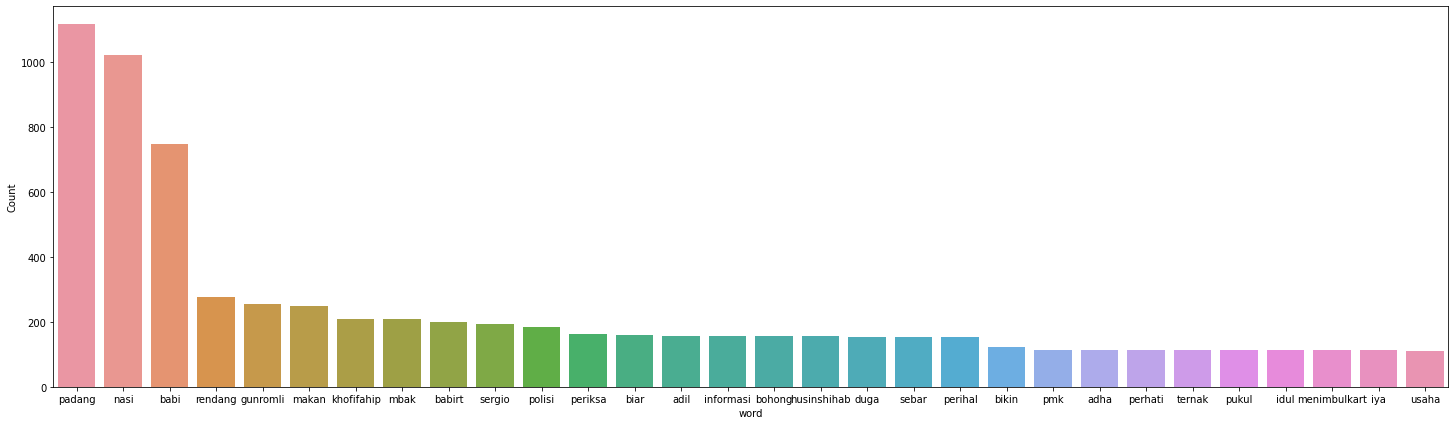

In [ ]:
#Membuat Visualisasi Stacked Bar
def freq_words(x,terms=30):
    all_words=''.join([text for text in x])
    all_words=all_words.split()
    fdist=FreqDist(all_words)
    word_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})

    d=word_df.nlargest(columns="count",n=terms)
    plt.figure(figsize=(25,7))
    ax=sns.barplot(data=d,x="word",y="count")
    ax.set(ylabel='Count')
    plt.show()
freq_words(cleaned_data,30)

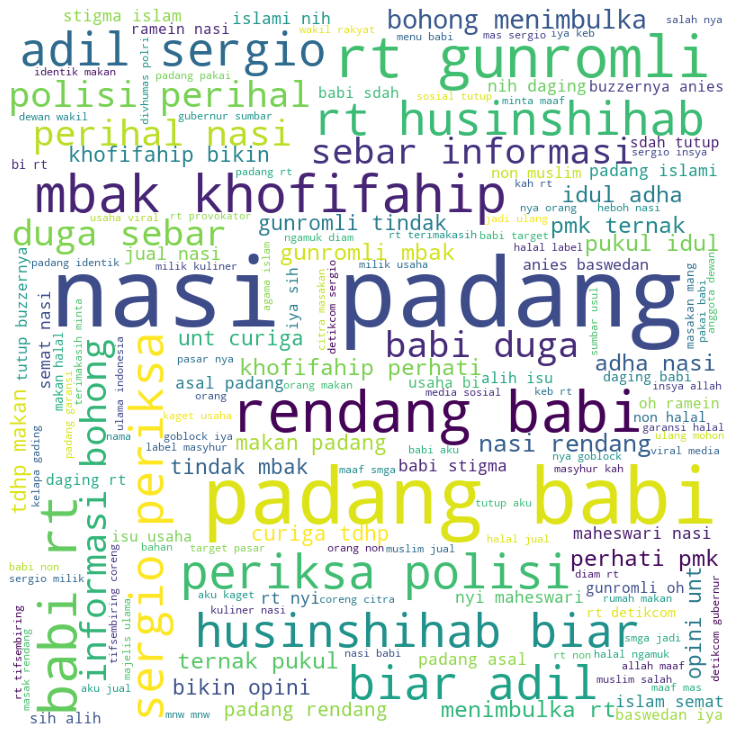

In [ ]:
#Membuat Visualisasi Cirrus
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(cleaned_data))
# Generate plot
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**PENJELASAN**

Untuk visualisasi data menggunakan **Cirrus dan Stacked Bar** kami dapat mengumpulkan informasi tingkat keseringan munculnya suatu kata. Melalui kata utama "nasi padang babi" pada pengambilan data, maka didapatkan kata yang paling sering muncul berturut-turut, yaitu "padang", "nasi", "babi", "gunromli", dan "makan"


**Trends**

Selanjutnya, untuk memudahkan memvisualisasi untuk **Trends**, kami menggunakan Voyant Online sebagai medianya.

image_2022-06-12_194113297.png

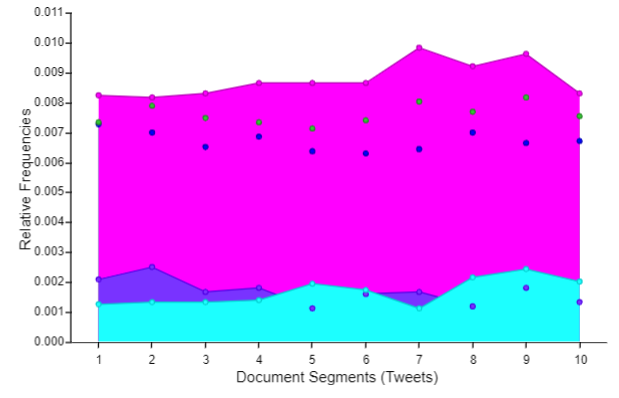


**Trends** ini digunakan untuk menunjukkan frekuensi relatif bagi setiap istilah/kata di setiap dokumen (dalam hal ini dataset) dalam korpus.

# **KESIMPULAN**


Topik yang kelompok kami pilih pada project ini adalah nasi goreng babi yang sedang marak dibicarakan oleh masyarakat. Kabar ini menimbulkan pro dan kontra dari masyarakat, melalui 1000 tweet yang kami kumpulkan muncul banyaknya kata kunci, melalui visualisasi data maka dapat kami temukan kata kunci yang paling sering muncul adalah "padang", "nasi", "babi", "gunromli", dan "makan".

